# Creating Multiscale Images
Sometimes it is useful or necessary to study processes across multiple scales.  It is possible to generate artificial images with 2 scales of porosity fairly easily.  

In [1]:
import porespy as ps
import matplotlib.pyplot as plt


## Using ``blobs`` of different ``blobiness``
Start by creating one image at a large scale.  Let's use blobs to define the large scale 'super-structure':

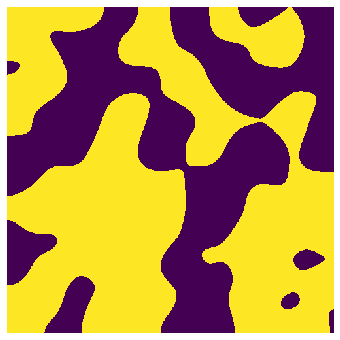

In [11]:
im1 = ps.generators.blobs([500, 500], blobiness=0.5, porosity=0.6)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im1, interpolation='none')
ax.axis(False);

Now we'll can create a second image of ``blobs``, but with a different scale.  These will represent the 'sub-structure':


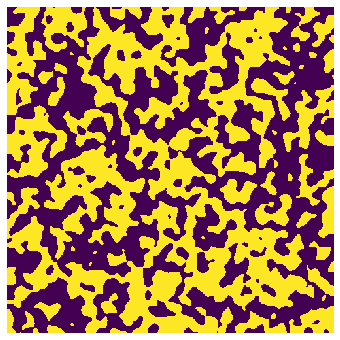

In [12]:
im2 = ps.generators.blobs([500, 500], blobiness=2.5, porosity=0.5)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im2, interpolation='none')
ax.axis(False);

Finally, we can multiply these two image (i.e. arrays) together, which will have the effect of perforating the foreground phase of ``im1`` with holes defined by the background phase of ``im2``.  Note the inverting of the image to ensure the foreground and background are maintained:

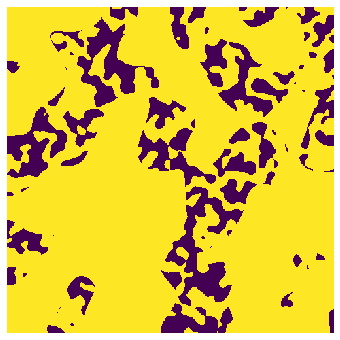

In [15]:
im3 = ~(~im1*im2)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im3, interpolation='none')
ax.axis(False);

The pore sizes can be analyzed using ``local_thickess``, to confirm a bi-modal pore size distribution:

In [20]:
lt = ps.filters.local_thickness(im3)
psd = ps.metrics.pore_size_distribution(lt)

  0%|          | 0/25 [00:00<?, ?it/s]

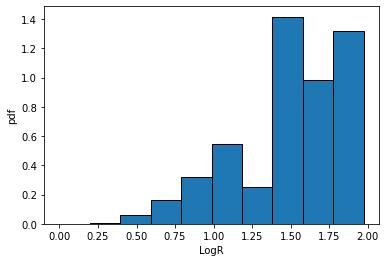

In [19]:
ps.visualization.bar(psd);

## Using ``rsa`` to insert non-overlapping spheres into ``blobs``
Another way is to use ``rsa`` to insert spheres into the background of another image.  Let's use ``blobs`` to define the superstructure, the perforate it with holes:

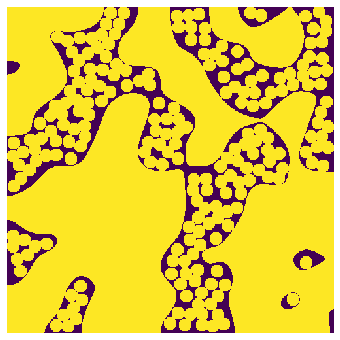

In [28]:
im4 = ps.generators.rsa(im1, r=10, clearance=-2)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(im4, interpolation='none')
ax.axis(False);

## Summary
The concept of generate multiple images and different scales then superimposing them is a very easy to make some simple multiscale images for prototyping and testing workflows that require multiscale images.  